# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [60]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 628


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [61]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + '&q=' + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | colon
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | vernon
Processing Record 4 of Set 1 | nova sintra
Processing Record 5 of Set 1 | puerto natales
Processing Record 6 of Set 1 | sechura
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | avarua
Processing Record 9 of Set 1 | amga
Processing Record 10 of Set 1 | hithadhoo
Processing Record 11 of Set 1 | saint-joseph
Processing Record 12 of Set 1 | pangody
Processing Record 13 of Set 1 | olonkinbyen
Processing Record 14 of Set 1 | thompson
Processing Record 15 of Set 1 | ust-nera
Processing Record 16 of Set 1 | ta`u
Processing Record 17 of Set 1 | baardheere
Processing Record 18 of Set 1 | cabedelo
Processing Record 19 of Set 1 | west island
Processing Record 20 of Set 1 | flin flon
Processing Record 21 of Set 1 | yellowknife
Processing Record 22 of Set 1 | albany
Processing Record 23 of Set 1 |

In [62]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          604
Lat           604
Lng           604
Max Temp      604
Humidity      604
Cloudiness    604
Wind Speed    604
Country       604
Date          604
dtype: int64

In [63]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,colon,9.3592,-79.9014,297.54,76,81,6.71,PA,1703056177
1,waitangi,-43.9535,-176.5597,289.72,89,96,1.34,NZ,1703056126
2,vernon,50.2581,-119.2691,277.76,91,100,1.17,CA,1703056142
3,nova sintra,14.8667,-24.7167,293.75,71,93,6.94,CV,1703056204
4,puerto natales,-51.7236,-72.4875,281.49,97,17,1.82,CL,1703056205


In [64]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [65]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,colon,9.3592,-79.9014,297.54,76,81,6.71,PA,1703056177
1,waitangi,-43.9535,-176.5597,289.72,89,96,1.34,NZ,1703056126
2,vernon,50.2581,-119.2691,277.76,91,100,1.17,CA,1703056142
3,nova sintra,14.8667,-24.7167,293.75,71,93,6.94,CV,1703056204
4,puerto natales,-51.7236,-72.4875,281.49,97,17,1.82,CL,1703056205


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

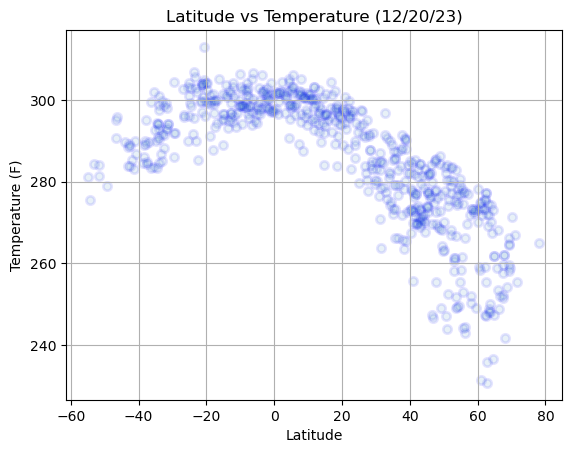

In [66]:
# Build scatter plot for latitude vs. temperature
lats = city_data_df["Lat"]
temps = city_data_df["Max Temp"]
plt.scatter(lats,
            temps,
            edgecolor="blue", linewidths=2, marker="o",
            alpha=0.1, label="Cities")

# Incorporate the other graph properties
plt.title("Latitude vs Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

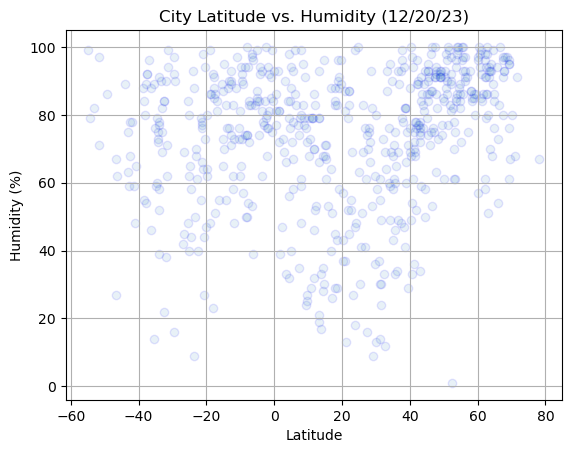

In [67]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df["Humidity"]
plt.scatter(lats,
            humidity,
            edgecolor="blue", linewidths=1, marker="o",
            alpha=0.1, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

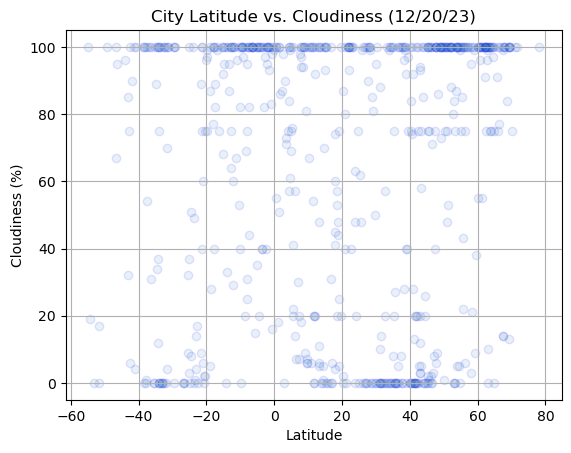

In [68]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness = city_data_df["Cloudiness"]
plt.scatter(lats, 
            cloudiness,
            edgecolor="blue", linewidths=1, marker="o", 
            alpha=0.1, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

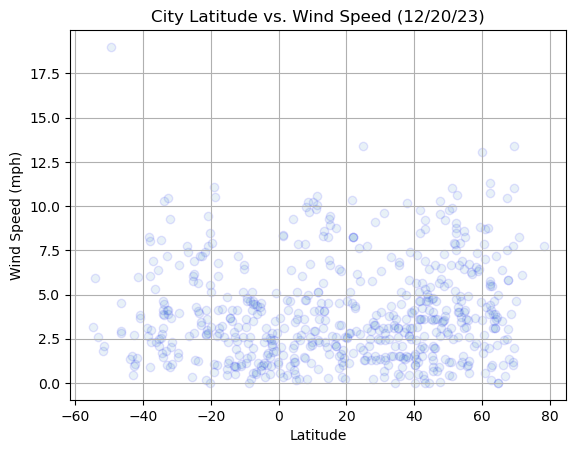

In [69]:
# Build the scatter plots for latitude vs. wind speed
wind_speed = city_data_df["Wind Speed"]
plt.scatter(lats, 
            wind_speed,
            edgecolor="blue", linewidths=1, marker="o", 
            alpha=0.1, label="Cities")
# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [70]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    (slope, intercept, r_value, _, _) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")

In [71]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,colon,9.3592,-79.9014,297.54,76,81,6.71,PA,1703056177
2,vernon,50.2581,-119.2691,277.76,91,100,1.17,CA,1703056142
3,nova sintra,14.8667,-24.7167,293.75,71,93,6.94,CV,1703056204
8,amga,60.8953,131.9608,231.42,99,100,0.57,RU,1703056210
11,pangody,65.8500,74.4859,258.93,94,91,6.40,RU,1703056213


In [72]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df =city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,waitangi,-43.9535,-176.5597,289.72,89,96,1.34,NZ,1703056126
4,puerto natales,-51.7236,-72.4875,281.49,97,17,1.82,CL,1703056205
5,sechura,-5.5569,-80.8222,294.76,83,15,4.29,PE,1703056207
6,port-aux-francais,-49.3500,70.2167,278.99,86,100,19.00,TF,1703056208
7,avarua,-21.2078,-159.7750,297.18,78,75,3.60,CK,1703056209


###  Temperature vs. Latitude Linear Regression Plot

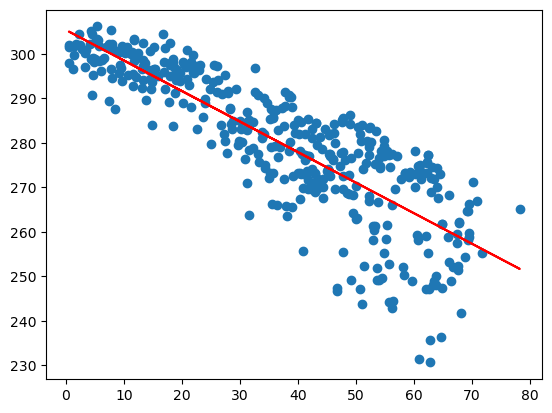

In [73]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', 'Latitude', 'Northern Hemisphere')


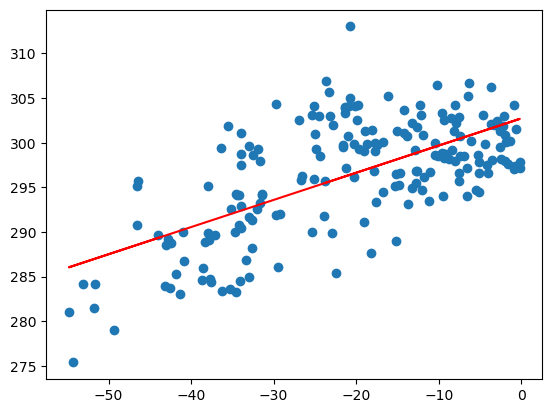

In [74]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', 'Latitude', 'Southern Hemisphere')


**Discussion about the linear relationship:** Trending in different directions based on hemisphere

### Humidity vs. Latitude Linear Regression Plot

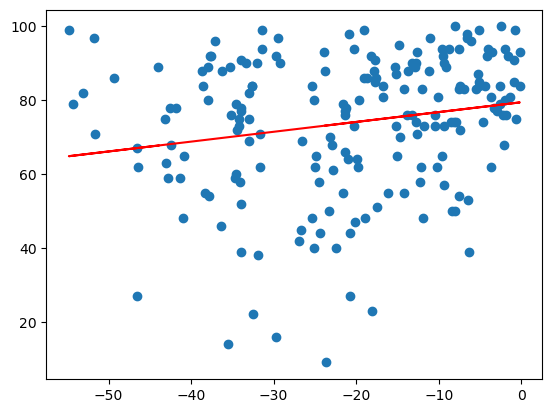

In [75]:
# Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', 'Latitude', 'Nothern Hemisphere')

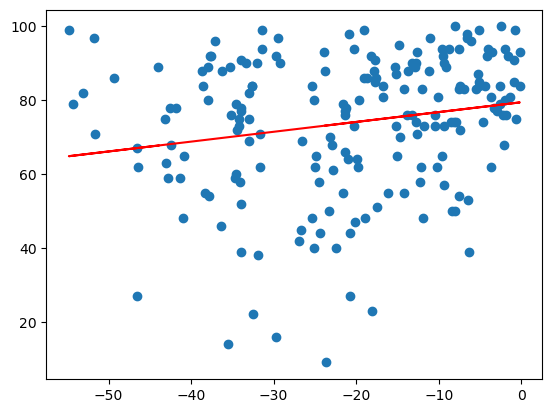

In [76]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', 'Latitude', 'Southern Hemisphere')

**Discussion about the linear relationship:** Data came out similar n/a

### Cloudiness vs. Latitude Linear Regression Plot

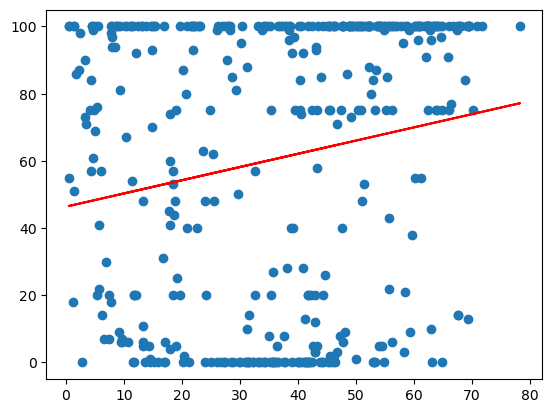

In [77]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', 'Latitude', 'Nothern Hemisphere')

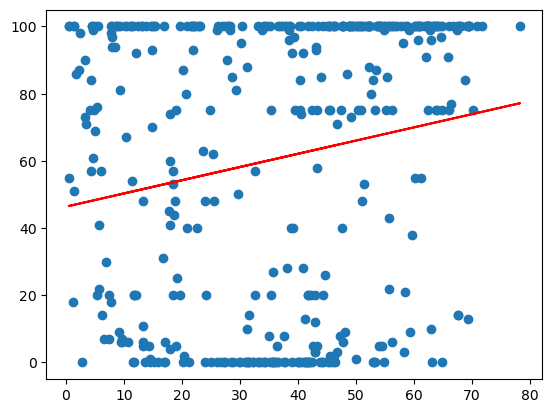

In [78]:
# Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', 'Latitude', 'Southern Hemisphere')

**Discussion about the linear relationship:** Data came out similar n/a

### Wind Speed vs. Latitude Linear Regression Plot

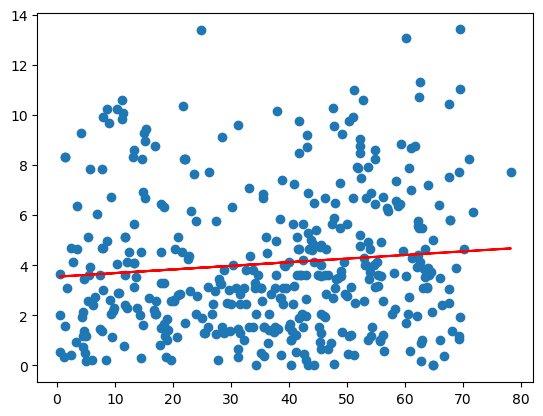

In [79]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', 'Latitude', 'Nothern Hemisphere')

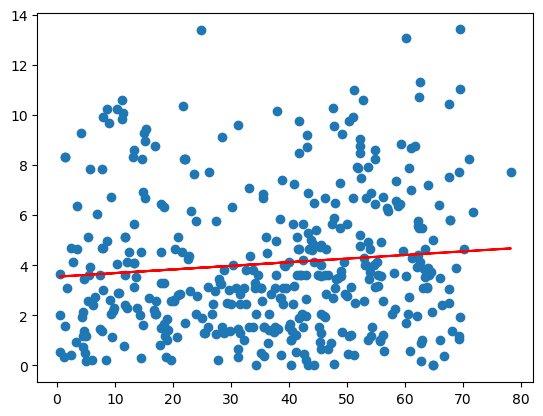

In [80]:
# Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', 'Latitude', 'Southern Hemisphere')

**Discussion about the linear relationship:** Data came out similar n/a